In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

# Data Cleaning

In [9]:
# the file is so big, need to change dtypes to save memory
# https://www.kaggle.com/code/theoviel/load-the-totality-of-the-data/notebook
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [10]:
malware_df = pd.read_csv("train.csv", dtype = dtypes)
malware_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSI

In [11]:
# get the shape of the dataframe
malware_df.shape

(8921483, 83)

In [13]:
# get the different columns
malware_df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [14]:
# get the unique values for each variable
malware_df.nunique(axis = 0)

MachineIdentifier                                    8921483
ProductName                                                6
EngineVersion                                             70
AppVersion                                               110
AvSigVersion                                            8531
IsBeta                                                     2
RtpStateBitfield                                           7
IsSxsPassiveMode                                           2
DefaultBrowsersIdentifier                               2017
AVProductStatesIdentifier                              28970
AVProductsInstalled                                        8
AVProductsEnabled                                          6
HasTpm                                                     2
CountryIdentifier                                        222
CityIdentifier                                        107366
OrganizationIdentifier                                    49
GeoNameIdentifier       

In [15]:
# summarize the different stats of the dataframe
malware_df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.000000,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,6169965.0,8921270.0,8.921483e+06,8.921483e+06,8.921483e+06,8885439.0,8.921483e+06,8.383724e+06,8862589.0,8830133.0,8.910645e+06,8.826005e+06,8.819250e+06,8880177.0,8880170.0,8.880140e+06,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8.874497e+06,8.874497e+06,8.652728e+06,8.921483e+06,8.921483e+06,8861399.0,8.921483e+06,8.921483e+06,1.512724e+06,8.760960e+06,3.254158e+06,8738226.0,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,1658.903809,4.948320e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.049152e+04,NaN,NaN,1.228161e+02,1.571997e+04,5.751534e+02,NaN,2.891896e-05,4.649162e-04,NaN,NaN,1.302773e+01,2.219056e+03,2.378578e+05,NaN,NaN,2.327470e+03,3.089053e+06,3.773683e+05,7.718728e-02,6.109390e+03,1.694262e+01,1.522598e+03,9.542983e+02,1.123782e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,1.388788e-05,1.007318e-05,2.508163e-04,NaN,3.268055e+04,4.860229e-01,2.980232e-07,7.202148e-03,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,999.028870,1.379994e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.873461e+04,0.0,NaN,6.932125e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,2.104187e-02,NaN,0.0,9.867770e+03,1.323710e+03,7.148446e+04,0.0,0.0,8.296290e+02,4.451634e+09,3.258791e+05,2.668884e-01,4.971148e+03,5.864020e+00,3.553196e+02,2.162140e+02,1.887782e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,3.726959e-03,3.173828e-03,1.582336e-02,NaN,2.112612e+04,4.998046e-01,5.459785e-04,8.453369e-02,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.000000,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,1.0,1.0,1.000000e+00,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.000000e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,7.600000e+03,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.000000,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,18.0,89.0,7.400000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.000000e+00,111.0,1.0,1.000000e+00,1.443000e+03,1.896920e+05,2.0,5.0,1.998000e+03,2.393720e+05,1.207750e+05,0.000000e+00,4.096000e+03,1.390000e+01,1.366000e+03,7.680000e+02,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e

In [16]:
# check to see how many missing values are in each row
total_missing = malware_df.isnull().sum().sort_values(ascending = False)
percent_missing = malware_df.isnull().sum() / malware_df.isnull().count().sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total Missing', 'Percent Missing'])


In [17]:
missing_data

,Total Missing,Percent Missing
PuaMode,8919174,0.999741
Census_ProcessorClass,8884852,0.995894
DefaultBrowsersIdentifier,8488045,0.951416
Census_IsFlightingInternal,7408759,0.830440
Census_InternalBatteryType,6338429,0.710468
Census_ThresholdOptIn,5667325,0.635245
Census_IsWIMBootEnabled,5659703,0.634390
SmartScreen,3177011,0.356108
OrganizationIdentifier,2751518,0.308415
SMode,537759,0.060277


In [18]:
# Going to remove any column with more than 30% missing data
dropped_df = malware_df.drop(['PuaMode', 'Census_ProcessorClass', 'DefaultBrowsersIdentifier', 'Census_IsFlightingInternal',
                              'Census_InternalBatteryType', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'SmartScreen',
                              'OrganizationIdentifier'], axis = 1)

In [19]:
dropped_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,

In [20]:
# need to remove any rows that have missing data
cleaned_df = dropped_df.dropna()
cleaned_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,

In [21]:
# checking to make sure all the missing data has been removed
cleaned_df.isnull().sum()

MachineIdentifier                                    0
ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
IsBeta                                               0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsVer     

In [22]:
cleaned_df.shape

(7180589, 74)

# Visualizations

In [23]:
# getting the unique counts of HasDetections
detect_count = cleaned_df['HasDetections'].value_counts()
detect_count.sort_index(inplace = True)
detect_count

0    3540608
1    3639981
Name: HasDetections, dtype: int64

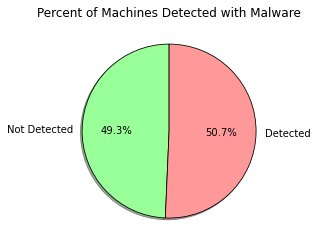

In [24]:
# visualize how many machines have been detected with malware
my_labels = ['Not Detected', 'Detected']
colors = ['#99ff99', '#ff9999']
wedges = {'edgecolor': 'black', 'linewidth': .8}

plt.pie(detect_count, labels = my_labels, startangle = 90, autopct = '%1.1f%%', shadow = True, wedgeprops = wedges,
        colors = colors)
plt.title("Percent of Machines Detected with Malware")
plt.show()

In [25]:
# visualize how many machines are protected
protect_count = cleaned_df['IsProtected'].value_counts()
protect_count.sort_index(inplace = True)
protect_count

0.0     309827
1.0    6870762
Name: IsProtected, dtype: int64

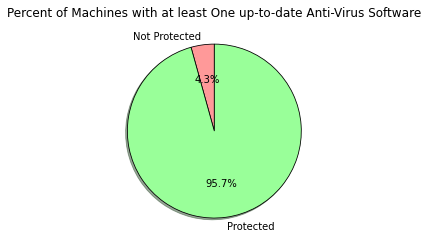

In [26]:
my_labels = ['Not Protected', 'Protected']
colors = ['#ff9999', '#99ff99']
wedges = {'edgecolor': 'black', 'linewidth': .8}

plt.pie(protect_count, labels = my_labels, startangle = 90, autopct = '%1.1f%%', shadow = True, wedgeprops = wedges,
        colors = colors)
plt.title("Percent of Machines with at least One up-to-date Anti-Virus Software")
plt.show()

In [28]:
corr = cleaned_df.corr()

In [29]:
# I set the correlation matrix from above and assign it to a gradient matrix
# this clears the output without having to mess with tick label rotation and shows patterns visually
corr.style.background_gradient(cmap='coolwarm')

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsBeta,1.000000,0.000170,-0.000152,-0.000311,-0.000467,0.000676,-0.009622,0.000482,0.000061,0.001131,-0.000682,-0.001530,-0.001474,0.000238,-0.000002,-0.000024,0.002656,0.000161,-0.000001,0.000303,0.000341,0.000250,-0.000751,-0.000592,-0.000001,0.000097,0.000122,0.000269,0.000234,0.000928,0.001049,0.000195,-0.000214,0.000011,-0.000820,-0.000805,-0.000026,-0.000004,-0.000359,-0.000374,-0.001124,0.002199,-0.000435,-0.000230,-0.000279,-0.000185,0.000716,-0.000140
RtpStateBitfield,0.000170,1.000000,-0.900975,0.116552,-0.189230,-0.008580,-0.000598,0.013452,-0.001602,0.017985,0.009856,-0.031538,-0.010581,0.057930,-0.004685,0.003129,-0.030726,0.005216,0.000182,0.002322,0.000161,-0.022678,0.000941,-0.009895,0.000096,-0.018717,-0.007782,-0.025841,-0.014189,-0.020011,-0.014654,-0.007638,-0.037198,0.025648,-0.015753,-0.015426,0.000002,-0.000074,0.008971,0.007522,-0.013731,0.005957,0.010848,0.005835,0.020769,-0.022884,-0.003394,0.045562
IsSxsPassiveMode,-0.000152,-0.900975,1.000000,-0.120725,0.198355,0.028791,0.002882,-0.013582,0.001279,-0.018169,-0.013829,0.041917,0.014690,-0.043579,-0.000209,-0.002943,0.011103,-0.002164,-0.000163,-0.003648,0.001003,0.027634,0.002229,0.012214,-0.000086,0.015734,0.007282,0.030049,0.012424,0.025162,0.019451,0.003205,0.041169,-0.025754,0.013501,0.013029,-0.000876,-0.000448,-0.008805,-0.007477,0.017651,-0.006541,-0.007703,-0.002298,-0.016744,0.028082,0.002814,-0.039226
AVProductStatesIdentifier,-0.000311,0.116552,-0.120725,1.000000,-0.647986,-0.115788,0.022899,0.004802,-0.000955,0.016348,-0.077804,-0.052179,-0.061437,-0.135377,-0.001633,0.008547,-0.015960,0.002676,0.000141,0.016319,0.015732,0.047012,0.028678,0.021613,-0.000508,-0.093570,-0.043424,0.027254,0.001109,0.044662,0.057081,0.017916,-0.050546,0.029200,0.016351,0.014832,0.003479,0.000871,-0.013357,-0.022744,-0.047129,0.019777,0.039301,0.035463,0.061999,-0.027352,-0.015520,0.122341
AVProductsInstalled,-0.000467,-0.189230,0.198355,-0.647986,1.000000,0.272190,0.008357,-0.022991,0.004516,-0.048184,0.039256,-0.005629,0.179538,-0.017082,0.001108,-0.013447,-0.020232,-0.003293,-0.000143,-0.061547,-0.048003,-0.050076,-0.021241,-0.035564,0.000043,0.146054,0.017299,-0.031798,-0.037381,-0.039555,-0.068016,-0.085146,-0.010899,-0.021289,0.010949,0.009911,-0.007989,-0.001751,0.055297,0.044756,0.211548,-0.030921,-0.017162,-0.031683,-0.071407,0.009615,0.034118,-0.151918
AVProductsEnabled,0.000676,-0.008580,0.028791,-0.115788,0.272190,1.000000,-0.008250,-0.018169,0.004670,-0.024459,-0.018787,-0.061918,0.027065,0.080830,0.000407,-0.002653,0.074583,-0.008011,-0.000140,-0.003893,-0.020062,0.000396,-0.002444,-0.001096,-0.000074,0.011081,0.002203,-0.001327,-0.002204,0.001663,-0.003946,-0.007106,-0.041189,0.017383,0.037979,0.037298,-0.001738,-0.000385,0.011366,-0.000962,0.036499,-0.006481,-0.002790,-0.007123,-0.018149,-0.005893,0.003925,-0.042950
Has

# Prep Data / Build Model

Data set is so big. Keep getting errors, (Unable to allocate 72.4 TiB for an array with shape (8921483, 8921483) and data type uint8); will sample the data set to make it easier

In [30]:
cleaned_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,

In [61]:
# selected the columns based off domain knowledge and expertise
mem_df = cleaned_df[["EngineVersion", "CityIdentifier", "Platform", "OsVer", "OsBuild", "OsSuite", "SMode", "Firewall", "Census_IsPortableOperatingSystem"]]
mem_df.head()

,EngineVersion,CityIdentifier,Platform,OsVer,OsBuild,OsSuite,SMode,Firewall,Census_IsPortableOperatingSystem
0,1.1.15100.1,128035.0,windows10,10.0.0.0,17134,256,0.0,1.0,0
1,1.1.14600.4,1482.0,windows10,10.0.0.0,17134,256,0.0,1.0,0
2,1.1.15100.1,153579.0,windows10,10.0.0.0,17134,768,0.0,1.0,0
3,1.1.15100.1,20710.0,windows10,10.0.0.0,17134,256,0.0,1.0,0
4,1.1.15100.1,37376.0,windows10,10.0.0.0,17134,768,0.0,1.0,0


In [69]:
# getting the shape
mem_df.shape

(7180589, 9)

In [62]:
# getting the dummy variables because decisiontree from sklearn doesn't handle categorical variables
dummies_df = pd.get_dummies(mem_df)
dummies_df.head()

,CityIdentifier,OsBuild,OsSuite,SMode,Firewall,Census_IsPortableOperatingSystem,EngineVersion_1.1.12805.0,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13504.0,EngineVersion_1.1.13601.0,EngineVersion_1.1.13701.0,EngineVersion_1.1.13704.0,EngineVersion_1.1.13804.0,EngineVersion_1.1.13903.0,EngineVersion_1.1.14002.0,EngineVersion_1.1.14003.0,EngineVersion_1.1.14103.0,EngineVersion_1.1.14104.0,EngineVersion_1.1.14202.0,EngineVersion_1.1.14305.0,EngineVersion_1.1.14306.0,EngineVersion_1.1.14405.2,EngineVersion_1.1.14500.5,EngineVersion_1.1.14600.4,EngineVersion_1.1.14700.3,EngineVersion_1.1.14700.4,EngineVersion_1.1.14700.5,EngineVersion_1.1.14800.1,EngineVersion_1.1.14800.3,EngineVersion_1.1.14901.3,EngineVersion_1.1.14901.4,EngineVersion_1.1.15000.1,EngineVersion_1.1.15000.2,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_1.1.15300.5,EngineVersion_1.1.15300.6,EngineVersion_1.1.14303.0,EngineVersion_1.1.14201.0,EngineVersion_1.1.11701.0,EngineVersion_1.1.13102.0,EngineVersion_1.1.12400.0,EngineVersion_1.1.14500.2,EngineVersion_1.1.14001.0,EngineVersion_1.1.11804.0,EngineVersion_1.1.10401.0,EngineVersion_1.1.13902.0,EngineVersion_1.1.12603.0,EngineVersion_1.1.14102.0,EngineVersion_1.1.12706.0,EngineVersion_1.1.12002.0,EngineVersion_1.1.13803.0,EngineVersion_1.1.12101.0,EngineVersion_1.1.13406.0,EngineVersion_1.1.13802.0,EngineVersion_1.1.10302.0,EngineVersion_1.1.11400.0,EngineVersion_1.1.12804.0,EngineVersion_1.1.12300.0,EngineVersion_1.1.12205.0,EngineVersion_1.1.11903.0,EngineVersion_1.1.12505.0,EngineVersion_1.1.11502.0,EngineVersion_1.1.9700.0,EngineVersion_1.1.11602.0,EngineVersion_1.1.13503.0,EngineVersion_1.1.13301.0,EngineVersion_1.1.11202.0,EngineVersion_1.1.11104.0,EngineVersion_1.1.12802.0,EngineVersion_1.1.10701.0,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,OsVer_10.0.0.0,OsVer_6.1.1.0,OsVer_6.3.0.0,OsVer_10.0.1.44,OsVer_6.1.0.0,OsVer_6.1.3.0,OsVer_6.3.1.0,OsVer_10.0.3.0,OsVer_10.0.1.0,OsVer_10.0.32.72,OsVer_10.0.2.0,OsVer_10.0.5.18,OsVer_10.0.0.1,OsVer_10.0.21.0,OsVer_6.3.3.0,OsVer_10.0.4.0,OsVer_10.0.80.0,OsVer_10.0.7.0,OsVer_10.0.5.0,OsVer_6.3.4.0,OsVer_10.0.32.0,OsVer_10.0.3.80,OsVer_10.0.2.86,OsVer_10.0.19.80,OsVer_10.0.16.36,OsVer_6.1.0.112,OsVer_10.0.5.117,OsVer_10.0.48.0,OsVer_6.3.16.0,OsVer_10.0.16.0,OsVer_10.0.1.144,OsVer_10.0.7.101,OsVer_6.1.7.0,OsVer_6.1.0.128,OsVer_10.0.0.96,OsVer_10.0.0.112,OsVer_10.0.0.22,OsVer_10.0.153.153,OsVer_10.0.8.0,OsVer_10.0.23.0,OsVer_6.3.0.16,OsVer_10.0.0.3,OsVer_6.3.5.0,OsVer_10.0.6.0,OsVer_6.1.2.0,OsVer_6.3.80.0,OsVer_6.1.6.0,OsVer_6.1.4.0,OsVer_6.3.32.72,OsVer_10.0.4.80,OsVer_6.1.16.36,OsVer_6.3.1.144,OsVer_6.3.0.2,OsVer_6.3.0.117,OsVer_10.0.0.2,OsVer_6.3.0.112,OsVer_10.0.0.80,OsVer_6.3.7.0
0,128035.0,17134,256,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1482.0,17134,256,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,153579.0,17134,768,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20710.0,17134,256,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [63]:
features_df = dummies_df

In [64]:
target = cleaned_df["HasDetections"]

In [65]:
# splitting the data with a 80/20 ratio
feature_train, feature_test, target_train, target_test = train_test_split(features_df, target, test_size = 0.2)

In [66]:
# building the model
decisiontree = DecisionTreeClassifier(random_state = 42)

In [67]:
# fitting the model
tree_model = decisiontree.fit(feature_train, target_train)

In [68]:
# predicting if a computer will get malware on it
tree_pred = decisiontree.predict(feature_test)

In [73]:
accuracy = (accuracy_score(target_test, tree_pred)) * 100
print(f"The Decision Tree Classifier model's accuracy is {accuracy}")

The Decision Tree Classifier model's accuracy is 55.09909352852621


In [71]:
# summary report of precision, recall, f1-score
print(classification_report(target_test, tree_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53    707961
           1       0.55      0.59      0.57    728157

    accuracy                           0.55   1436118
   macro avg       0.55      0.55      0.55   1436118
weighted avg       0.55      0.55      0.55   1436118



In [75]:
matrix = confusion_matrix(target_test, tree_pred)
matrix

array([[360670, 347291],
       [297539, 430618]], dtype=int64)

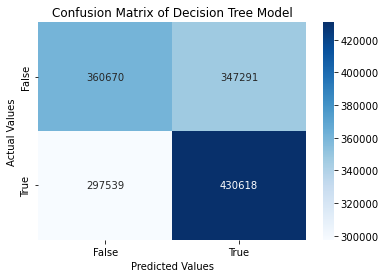

In [76]:
ax = sns.heatmap(matrix, annot = True, cmap = "Blues", fmt = "d")
ax.set_title("Confusion Matrix of Decision Tree Model")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()